Loading Data

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import  LinearRegression

df = pd.read_csv("IMDb_Movies_India.csv" , encoding='ISO-8859-1')

In [119]:
# df.head(5)
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [121]:
print(df.shape)
df.isnull().sum()

(15509, 10)


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Data Cleaning

In [122]:
df.duplicated().value_counts()

False    15503
True         6
Name: count, dtype: int64

In [123]:
df.drop_duplicates(subset='Name' , inplace=True)
df.duplicated().value_counts()


False    13838
Name: count, dtype: int64

In [124]:
df = df.drop(df.index[0]).reset_index(drop=True)
df.shape


(13837, 10)

In [125]:
# count the percent of missing value 

missing_values = df.isnull().sum().sort_values(ascending=False)
percent_of_missing_values = (round (df.isnull().sum() / df.isnull().count() , 4 ) * 100).sort_values(ascending=False)
percent_of_exist_values = (round (df.notnull().sum() / df.isnull().count() , 4 ) * 100).sort_values(ascending=False)

missing_data = pd.concat([missing_values,percent_of_missing_values , percent_of_exist_values], axis=1, keys=['missing_count', 'missing_percent' , 'notmissing_percent'])
missing_data


,missing_count,missing_percent,notmissing_percent
Duration,7238,52.31,47.69
Rating,6684,48.31,51.69
Votes,6683,48.30,51.70
Actor 3,2805,20.27,79.73
Actor 2,2132,15.41,84.59
Genre,1590,11.49,88.51
Actor 1,1439,10.40,89.60
Year,497,3.59,96.41
Director,465,3.36,96.64
Name,0,0.00,100.00


In [126]:
df.dropna(subset=['Rating'], inplace=True )
# (round (df.isnull().sum() / df.isnull().count() , 4 ) * 100).sort_values(ascending=False)
df.reset_index(drop=True, inplace=True)


In [127]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
# (round (df.isnull().sum() / df.isnull().count() , 4 ) * 100).sort_values(ascending=False)


In [128]:
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace('min','') , errors='coerce')
df['Duration'].fillna(df['Duration'].mean() , inplace=True)
# (round (df.isnull().sum() / df.isnull().count() , 4 ) * 100).sort_values(ascending=False)


In [129]:
for column in df.columns :
    print(column , end='  ')
    print(df[column].dtype)

Name  object
Year  object
Duration  float64
Genre  object
Rating  float64
Votes  object
Director  object
Actor 1  object
Actor 2  object
Actor 3  object


In [130]:
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])
df['Year'] = df['Year'].apply(lambda x: x.split('(')[1])
# df['Year']

In [131]:
df['Votes'] = df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',','').astype(int)
print(df['Votes'].dtype)

int32


In [132]:
df[['Rating', 'Duration', 'Votes']].describe()

,Rating,Duration,Votes
count,6813.000000,6813.000000,6813.000000
mean,5.820065,132.816434,2107.025099
std,1.375330,22.224326,12378.151829
min,1.100000,21.000000,5.000000
25%,4.900000,123.000000,18.000000
50%,6.000000,132.816434,64.000000
75%,6.800000,144.000000,500.000000
max,10.000000,321.000000,591417.000000


In [133]:
#Year with best rating
sum_rating = df.groupby('Year')['Rating'].sum().sort_values(ascending=False)
best_year = sum_rating.idxmax()
print("Year with the best average rating:", best_year)

Year with the best average rating: 2019


Data Preprocessing

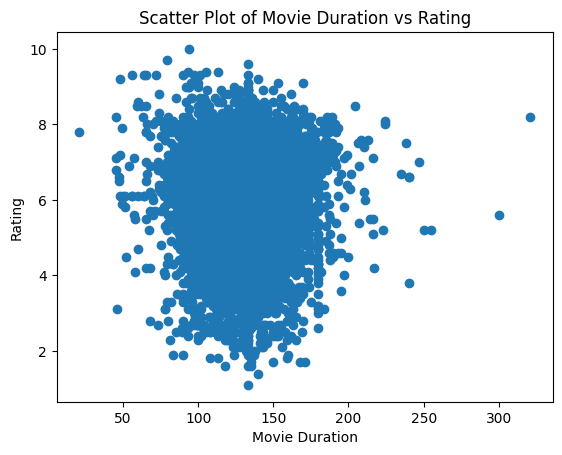

In [134]:
# Does length of movie have any impact with the rating?
plt.scatter(df['Duration'], df['Rating'])
plt.xlabel('Movie Duration')
plt.ylabel('Rating')
plt.title('Scatter Plot of Movie Duration vs Rating')
plt.show()


[ 21.  96. 171. 246. 321.]


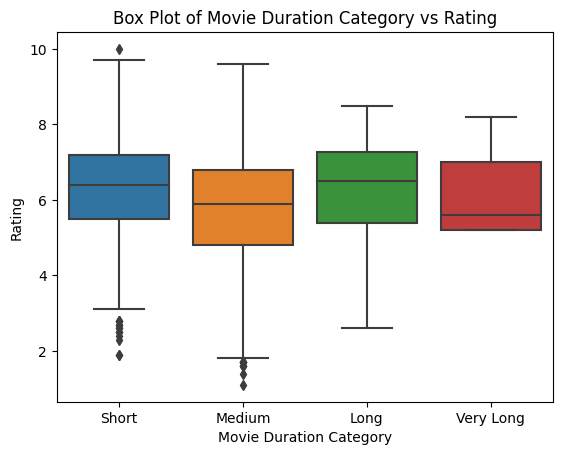

In [135]:
bins = np.linspace(min(df['Duration']) , max(df['Duration']),5)
print(bins)
group_names = ['Short', 'Medium', 'Long', 'Very Long']
df['Duration_category'] = pd.cut(df['Duration'] , bins=bins , labels=group_names , include_lowest=True)
sns.boxplot(x='Duration_category', y='Rating', data=df)
plt.xlabel('Movie Duration Category')
plt.ylabel('Rating')
plt.title('Box Plot of Movie Duration Category vs Rating')
plt.show()

In [136]:
# Top 10 movies according to rating per year and overall

Movie = df.groupby('Year').apply( lambda x : x.nlargest(10,'Rating'))  # apply lambda in each group 
Movie.head()

Name  Year    Duration  \
Year                                                  
1917 3806             Lanka Dahan  1917  132.816434   
1931 3373                 Kalidas  1931  132.816434   
     6489  The Light of the World  1931  124.000000   
     1951                Draupadi  1931  124.000000   
1932 2866              Indrasabha  1932  211.000000   

                               Genre  Rating  Votes                 Director  \
Year                                                                           
1917 3806  Adventure, Drama, Fantasy     6.7     22  Dhundiraj Govind Phalke   
1931 3373    Drama, History, Musical     6.2     12               H.M. Reddy   
     6489             Drama, Fantasy     6.2    112           Ardeshir Irani   
     1951                      Drama     5.3      6   Bhagwati Prasad Mishra   
1932 2866           Musical, Romance     6.0     12               J.J. Madan   

                    Actor 1           Actor 2              Actor 3  \
Year                                                                 
1917 3806      Anna Salunke  Ganpat G. Shinde           D.D. Dabke   
1931 3373  T.P. Rajalakshmi   P.G. Venkatesan          L.V. Prasad   
     6489     Master Vithal           Zubeida                Jillo   
     1951            Khalil          Ermeline                Jillo   
1932 2866            Nissar   Jehanara Kajjan  Abdul Rehman Kabuli   

          Duration_category  
Year                         
1917 3806            Medium  
1931 3373            Medium  
     6489            Medium  
     1951            Medium  
1932 2866              Long

In [137]:
top10_global = df.nlargest(10, 'Rating')
top10_global['Name']

3916        Love Qubool Hai
2539             Half Songs
1190                  Breed
2382           Gho Gho Rani
3220                   June
6514    The Reluctant Crime
650            Ashok Vatika
834                Baikunth
2410            God of gods
3920           Love Sorries
Name: Name, dtype: object

In [138]:
# Counting the number of votes which movies preformed better in rating per year and overall
votes_per_year = df.groupby('Year').apply(lambda x : x[x['Rating'] == x['Rating'].max()]['Votes'].sum())
overall_votes_for_top_movies = df[df['Rating'] == df['Rating'].max()]['Votes'].sum()

votes_per_year = pd.DataFrame(votes_per_year , columns=['count_votes'])
votes_per_year.reset_index(inplace=True)
votes_per_year

,Year,count_votes
0,1917,22
1,1931,124
2,1932,12
3,1933,37
4,1934,6
...,...,...
87,2017,62
88,2018,7
89,2019,47
90,2020,5


Text(0.5, 1.0, 'the number of votes which movies preformed better in rating from 2017-2021')

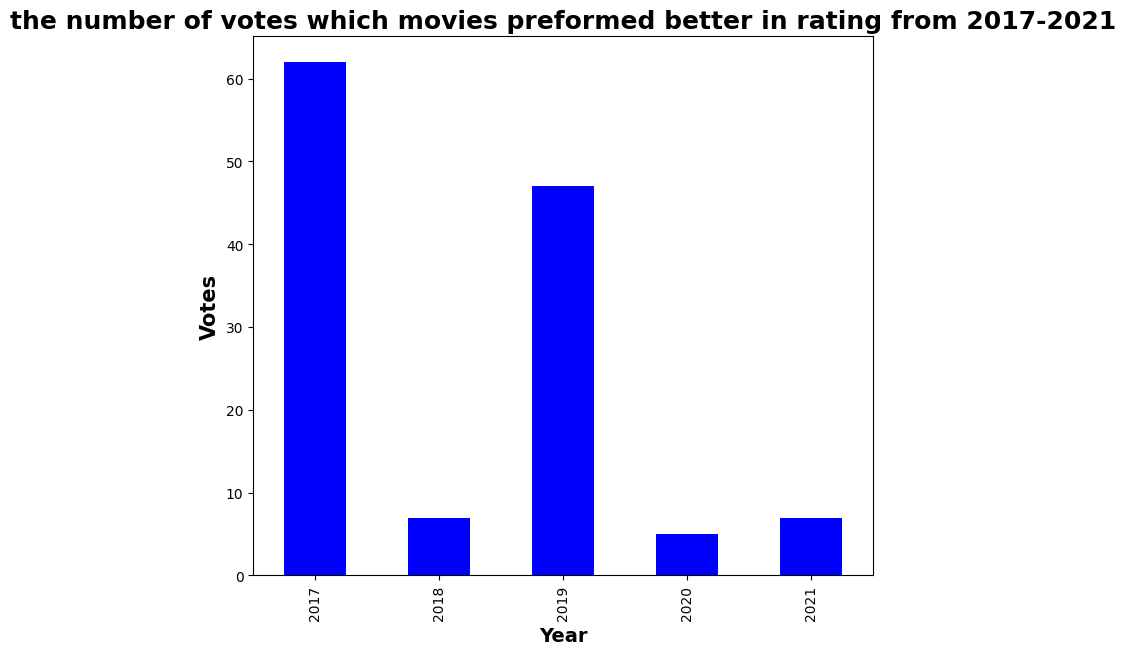

In [139]:
votes_per_year = votes_per_year.sort_values(by='Year',ascending=False).head().sort_values(by='Year',ascending=True)
bars = votes_per_year.plot(kind = 'bar',
                        x = 'Year',
                        y = 'count_votes',
                        color = 'blue',
                        legend = None,
                        figsize = (8,7))
plt.xlabel('Year', fontsize = 14, fontweight = 'bold')
plt.ylabel('Votes',fontsize = 15,fontweight = 'bold')
plt.title('the number of votes which movies preformed better in rating from 2017-2021',fontsize = 18,fontweight = 'bold')

In [140]:
df[['Duration' , 'Votes','Rating']].corr(method='pearson')['Rating'].abs()

Duration    0.001644
Votes       0.135912
Rating      1.000000
Name: Rating, dtype: float64

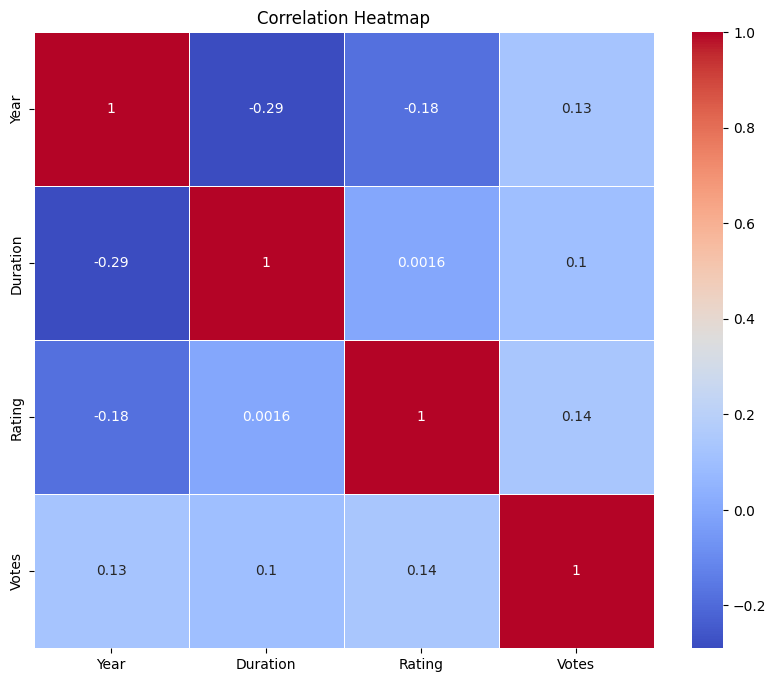

In [141]:
correlation_matrix = df[['Year', 'Duration', 'Rating', 'Votes']].corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()

In [142]:
df.drop(['Duration', 'Name'] , axis=1, inplace=True)

In [143]:
# Split the 'Genre' column by commas and create a list of genres for each row
df['Genre'] = df['Genre'].str.split(', ')

# Create a new DataFrame to store the expanded genre data
genre_data = df.explode('Genre')

# Calculate the count of movies for each genre
genre_counts = genre_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Calculate the mean rating for each genre
genre_mean_ratings = genre_data.groupby('Genre')['Rating'].mean().reset_index()
genre_mean_ratings.columns = ['Genre', 'Mean Rating']

# Merge the counts and mean ratings into a single DataFrame
genre_stats = pd.merge(genre_counts, genre_mean_ratings, on='Genre')

# Display the resulting DataFrame
print(genre_stats)


          Genre  Count  Mean Rating
0         Drama   4372     6.000549
1        Action   2045     5.436919
2       Romance   1583     5.752179
3        Comedy   1491     5.722468
4         Crime    992     5.711290
5      Thriller    772     5.536917
6        Family    573     6.177312
7       Musical    442     6.152715
8     Adventure    336     5.843155
9       Mystery    325     5.782769
10       Horror    247     4.733603
11      Fantasy    181     5.768508
12    Biography    121     6.700826
13      History    112     6.791964
14        Music     55     6.103636
15  Documentary     48     7.616667
16        Sport     45     6.386667
17    Animation     44     5.975000
18          War     32     6.021875
19       Sci-Fi     31     5.422581
20      Western      2     5.250000
21         News      1     8.000000


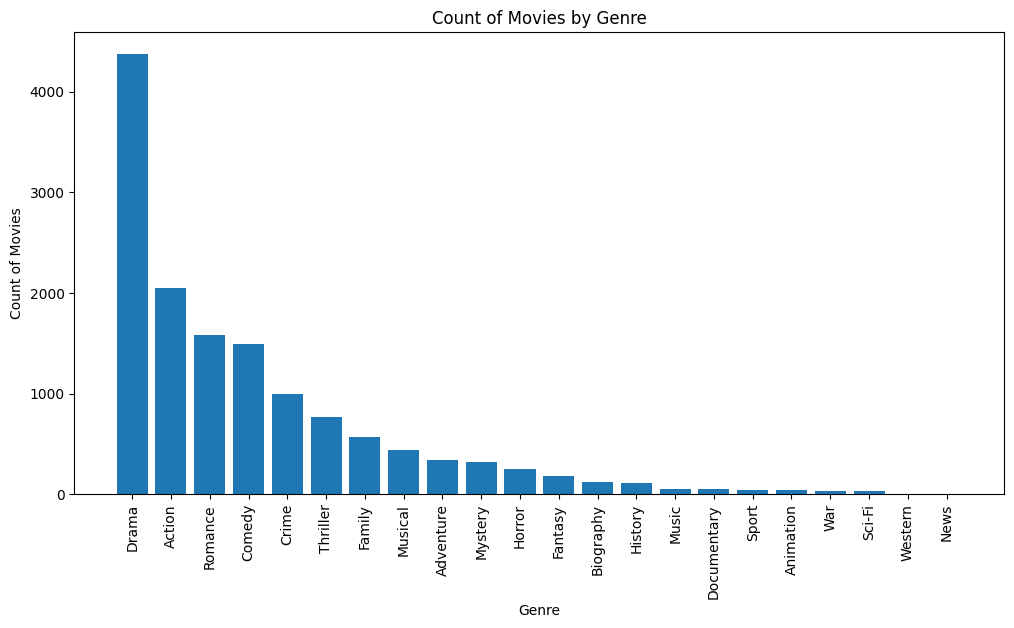

In [144]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genre_stats['Genre'], genre_stats['Count'])
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre')
plt.xticks(rotation=90)  
plt.show()

In [145]:
df.loc[df['Rating']==df['Rating'].max()]

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration_category
3916,2020,"[Drama, Romance]",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari,Short


In [146]:
df.loc[(df['Rating'].min()==df['Rating']) ]


,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration_category
5626,2020,"[Action, Drama]",1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt,Medium


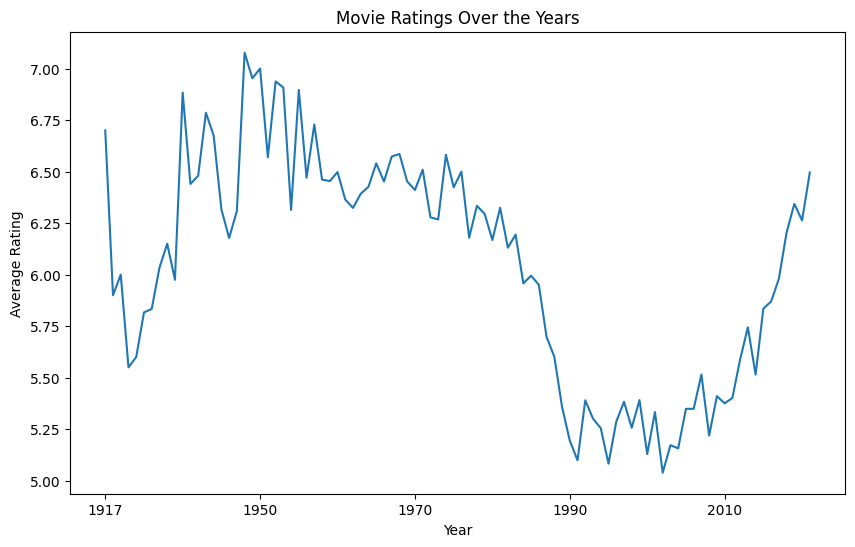

In [147]:
# Group data by year and calculate the mean rating for each year
ratings_by_year = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10, 6))
ratings_by_year.plot()
plt.title('Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

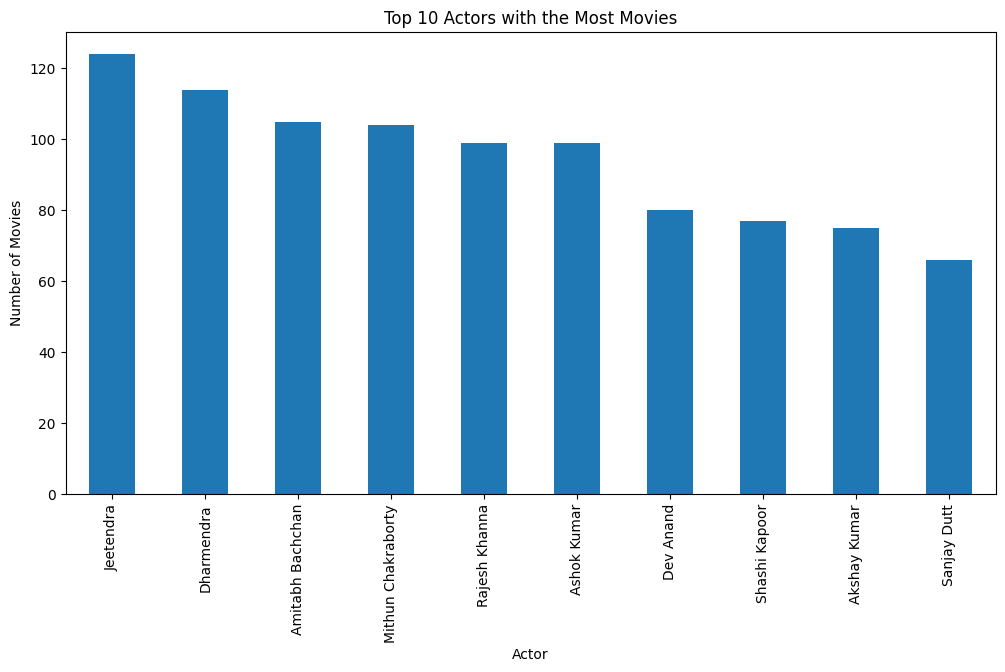

In [148]:
plt.figure(figsize=(12, 6))

# Count the number of movies for each actor 
top_actors = df['Actor 1'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 actors with the most movies
top_actors.plot(kind='bar')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  
plt.show()

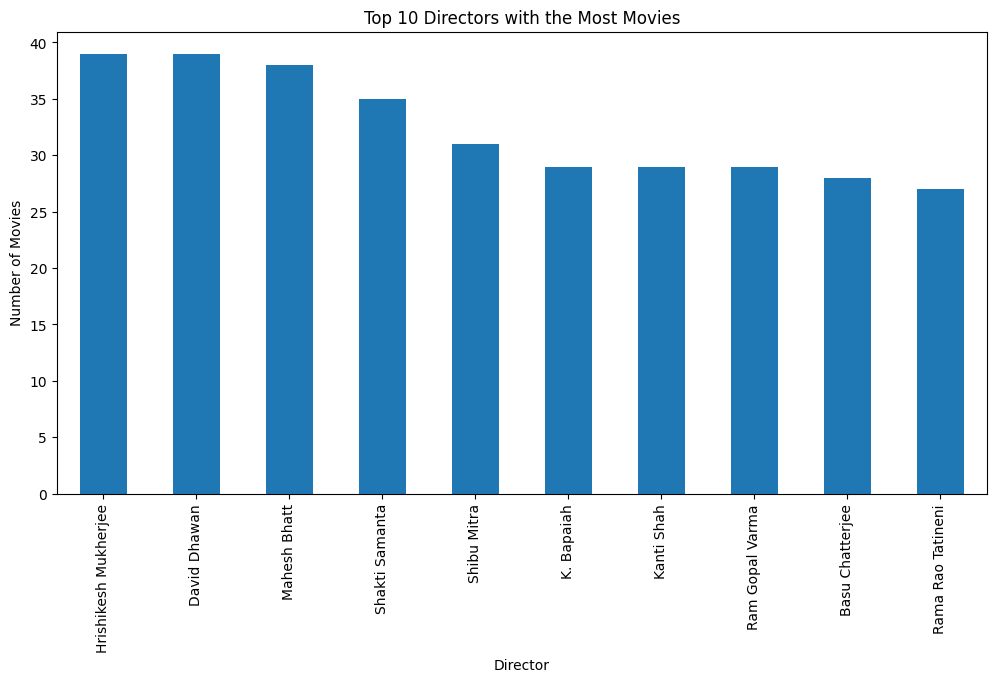

In [149]:
plt.figure(figsize=(12, 6))

# Count the number of movies for each Director  
top_actors = df['Director'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 directors with the most movies
top_actors.plot(kind='bar')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  
plt.show()

In [150]:
# feature Engineering
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

df.drop(['Director', 'Actor 1', 'Actor 2', 'Actor 3'] , axis=1, inplace=True)

In [151]:
# Turn categorical variables into quantitative variables 
# LabelEncoder object
label_encoder = LabelEncoder()
# Apply label encoding
df['Duration_category'] = label_encoder.fit_transform(df['Duration_category'])



In [152]:
df.head()

,Year,Genre,Rating,Votes,Duration_category,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,2019,[Drama],7.0,8,1,7.000000,6.850000,7.000000,7.000000
1,2019,"[Comedy, Romance]",4.4,35,1,4.400000,5.420000,4.400000,4.450000
2,1997,"[Comedy, Drama, Musical]",4.7,827,1,5.266667,4.885714,5.814286,5.872727
3,2005,"[Drama, Romance, War]",7.4,1086,1,7.500000,5.213636,6.050000,6.500000
4,2012,"[Horror, Mystery, Thriller]",5.6,326,2,5.600000,5.600000,5.883333,5.600000


In [153]:
# Splitting Independent and Dependent Variable
Y = df['Rating']
X = df.drop(['Rating','Genre'] , axis=1)

In [154]:
# Splitting train and test set

X_train , X_test ,y_train ,  y_test = train_test_split(X,Y,test_size=.3,random_state= 21)


In [155]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [156]:
print('Logistic Regression Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print()

print('Random Forest Regressor Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

Logistic Regression Model Performance: 
Mean squared error:  0.4420553991886678
Mean absolute error:  0.4946955503098951
R2 score:  0.7705971882918696

Random Forest Regressor Model Performance: 
Mean squared error:  0.3578360083170254
Mean absolute error:  0.40906800391389436
R2 score:  0.8143024910701194
